<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/Seoul_Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seoul Bike Sharing Demand Prediction**

**Tugas Besar AI - Linear Regression**

Dataset: [Seoul Bike Sharing Demand](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

Objective: Memprediksi jumlah sepeda yang disewa berdasarkan kondisi cuaca dan waktu

---
## Data Acquisition

In [145]:
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', None)

In [146]:
dataset = fetch_ucirepo(id=560)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


---
## Data Understanding

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [149]:
df.isnull().sum().to_frame('missing_count')

,missing_count
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


**Info:**
- Dataset memiliki 8760 entries dan 14 kolom tanpa missing values
- 4 kolom kategorikal (Date, Seasons, Holiday, Functioning Day) dan 10 kolom numerik
- Kolom `Date` tidak relevan untuk model prediksi yang nanti akan dihapus

---
## Exploratory Data Analysis (EDA)

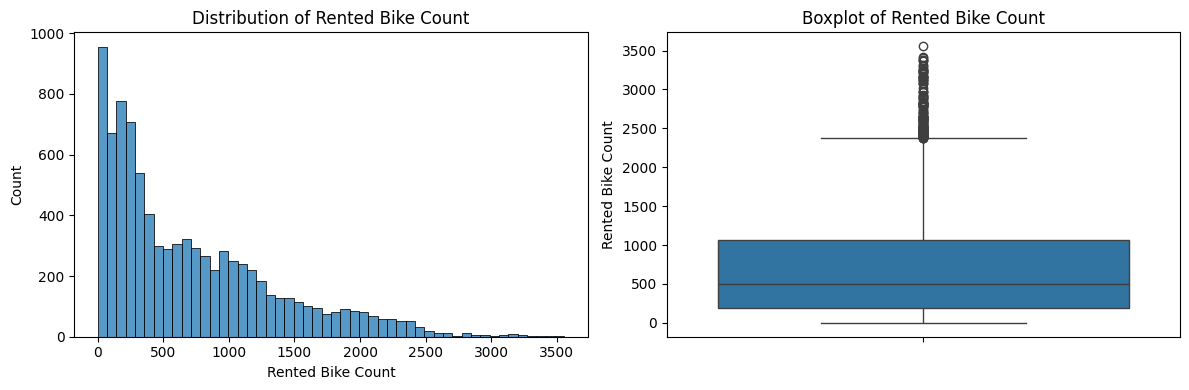

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Rented Bike Count'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Rented Bike Count')

sns.boxplot(y=df['Rented Bike Count'], ax=axes[1])
axes[1].set_title('Boxplot of Rented Bike Count')
plt.tight_layout()
plt.show()

In [152]:
# Hitung statistik
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
median = df['Rented Bike Count'].median()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [153]:
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Batas bawah outlier: {lower_bound}")
print(f"Batas atas outlier: {upper_bound}")

outliers = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]
print(f"\nJumlah outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Q1 (25%): 191.0
Q3 (75%): 1065.25
IQR: 874.25
Batas bawah outlier: -1120.375
Batas atas outlier: 2376.625

Jumlah outlier: 158 (1.80%)


**Outliers pada Rented Bike Count**

Menggunakan metode IQR, batas atas outlier ditemukan pada nilai ~2376. Data di atas batas ini dapat mengganggu performa model. Sebagai penanganan, nilai `Rented Bike Count` akan dibatasi maksimal sesuai upper bound untuk mengurangi pengaruh outliers.

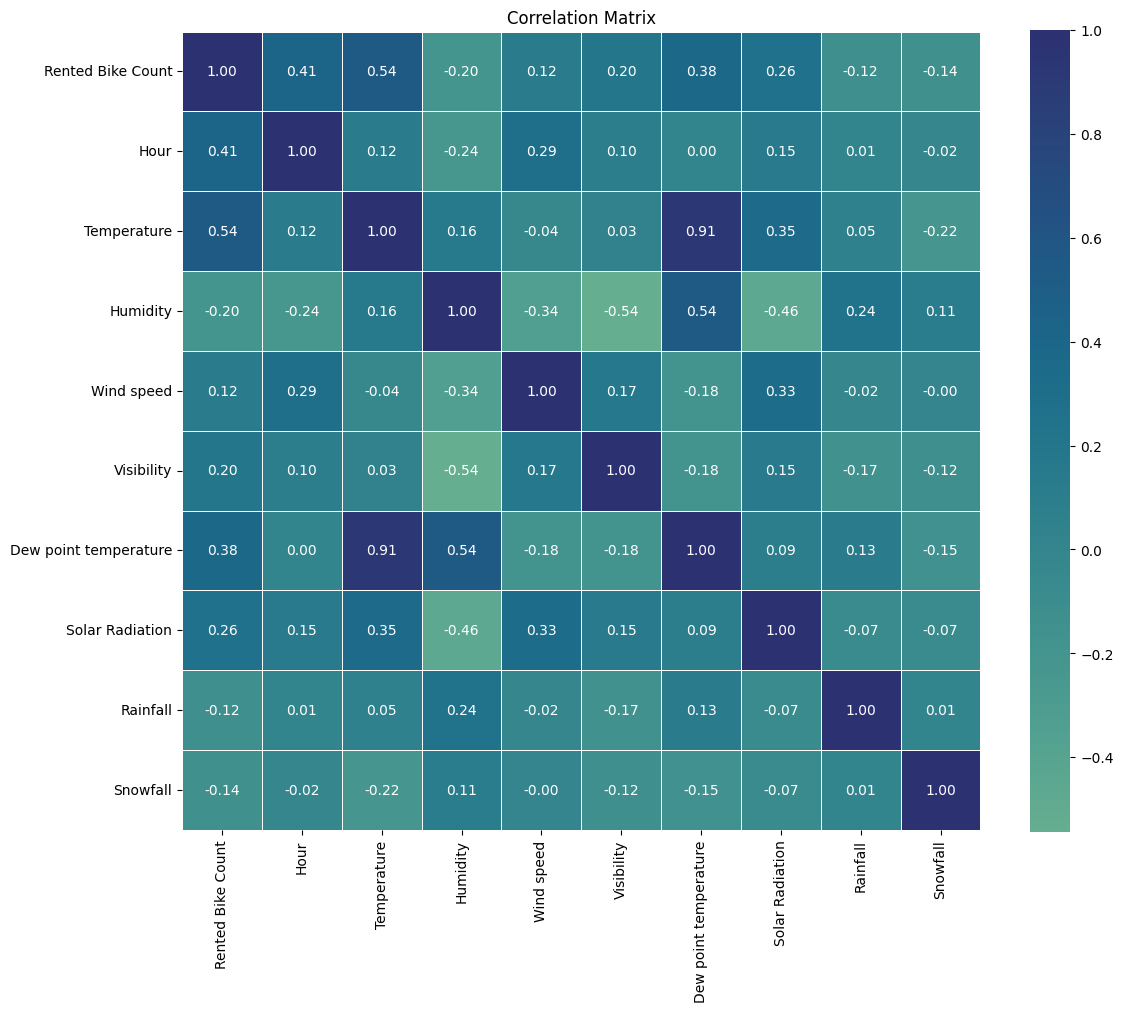

In [154]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Temperature & Dew Point memiliki korelasi tinggi (0.91)**

Korelasi 0.91 menunjukkan kedua variabel memberikan informasi hampir identik. Menyimpan keduanya akan menyebabkan multikolinearitas yang dapat mengganggu performa model. Cukup pertahankan `Temperature` karena lebih fundamental, sementara `Dew Point` dapat dihapus.

In [155]:
corr_matrix['Rented Bike Count'].sort_values(ascending=False).to_frame('correlation')

,correlation
Rented Bike Count,1.000000
Temperature,0.538558
Hour,0.410257
Dew point temperature,0.379788
Solar Radiation,0.261837
Visibility,0.199280
Wind speed,0.121108
Rainfall,-0.123074
Snowfall,-0.141804
Humidity,-0.199780


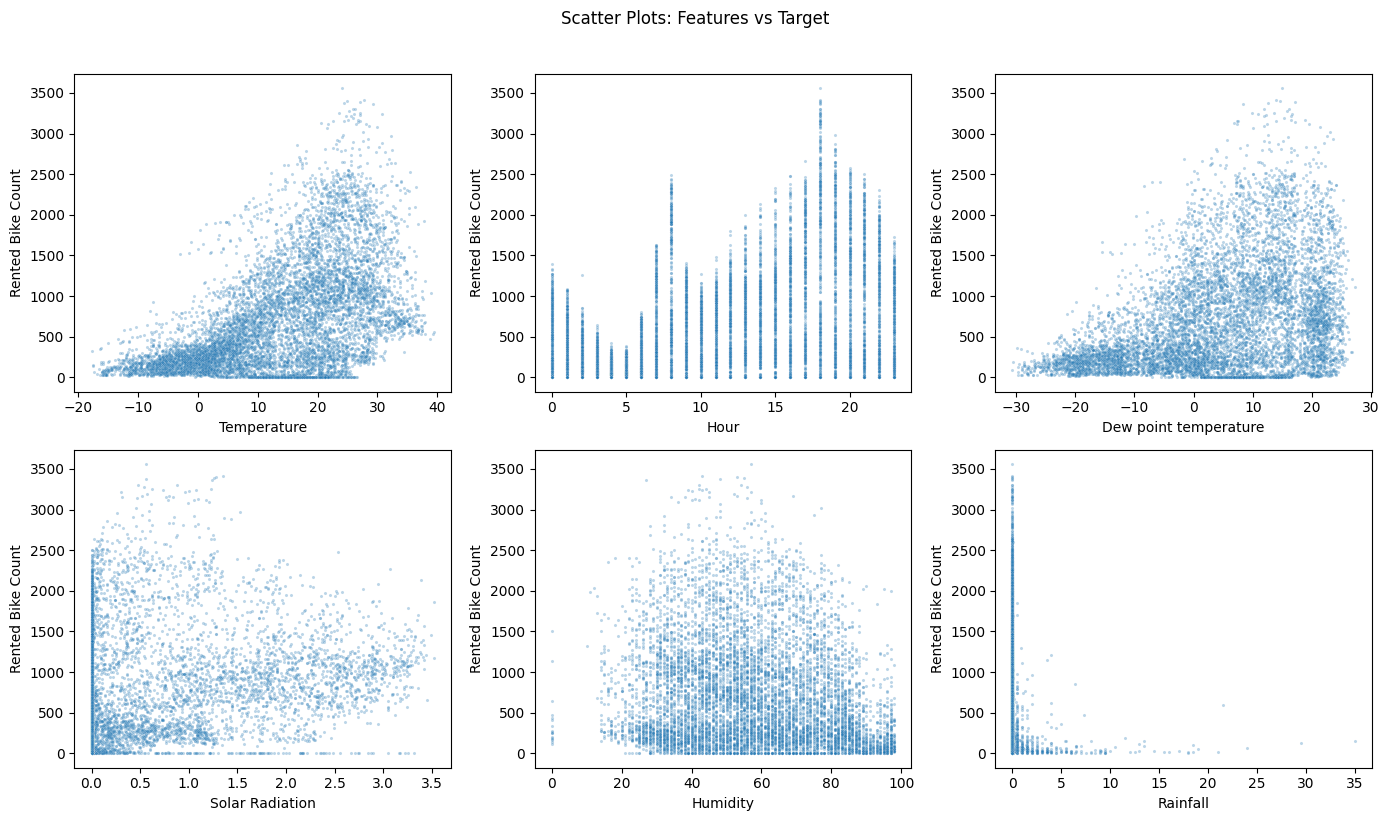

In [156]:
top_features = ['Temperature', 'Hour', 'Dew point temperature',
                'Solar Radiation', 'Humidity', 'Rainfall']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for idx, feat in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(data=df, x=feat, y='Rented Bike Count',
                    alpha=0.3, s=5, ax=ax)
plt.suptitle('Scatter Plots: Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

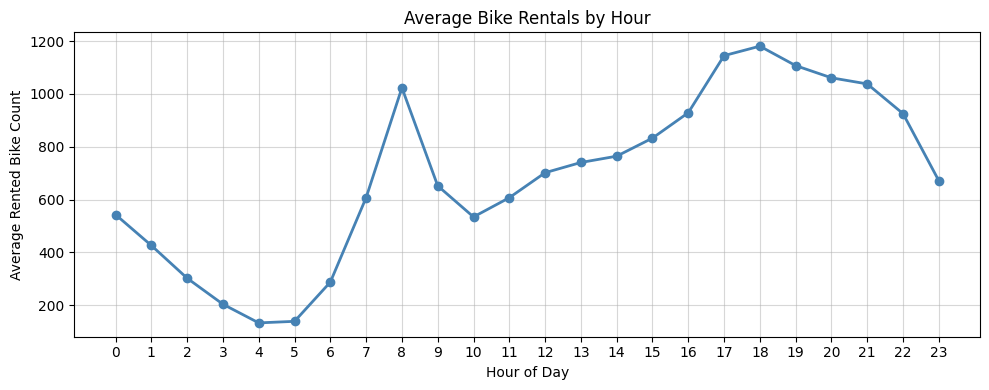

In [179]:
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg['Hour'], hourly_avg['Rented Bike Count'],
         marker='o', linewidth=2, markersize=6, color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Hubungan Fitur dengan Target**

- `Temperature` memiliki korelasi positif terkuat (0.54) dengan Rented Bike Count
- `Humidity` berkorelasi negatif (-0.20) yang berarti kelembaban tinggi menurunkan penyewaan
- `Hour` menunjukkan pola non-linear dimana penyewaan tinggi ada di jam 8 dan 18 (jam kerja)

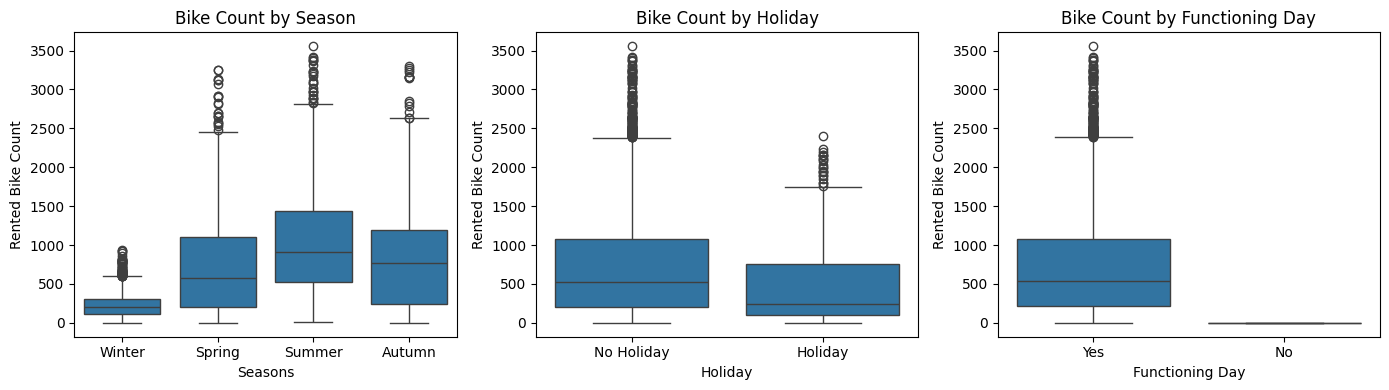

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', ax=axes[0])
axes[0].set_title('Bike Count by Season')

sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', ax=axes[1])
axes[1].set_title('Bike Count by Holiday')

sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=axes[2])
axes[2].set_title('Bike Count by Functioning Day')

plt.tight_layout()
plt.show()

Terlihat bahwa penyewaan sepeda tertinggi terjadi di musim Summer dan terendah di musim Winter. Selain itu, penyewaan justru lebih tinggi pada hari biasa  dibandingkan saat hari libur. Penyewaan  juga jauh lebih tinggi pada hari operasional, yang mengindikasikan bahwa mayoritas pengguna adalah pekerja yang menggunakan sepeda untuk aktivitas sehari-hari.

---
## Preprocessing

### Encode Kategorikal

Semua variabel kategorikal (Seasons, Holiday, Functioning Day) akan di-encode menjadi numerik karena algoritma Linear Regression hanya dapat memproses input berupa angka, bukan teks.

Label Encoding digunakan untuk mengubah kategori menjadi numerik:
- Seasons: Winter=1, Spring=2, Summer=3, Autumn=4
- Holiday: No Holiday=0, Holiday=1
- Functioning Day: No=0, Yes=1

In [159]:
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
holiday_map = {'No Holiday': 0, 'Holiday': 1}
func_map = {'No': 0, 'Yes': 1}

df['Seasons'] = df['Seasons'].map(season_map)
df['Holiday'] = df['Holiday'].map(holiday_map)
df['Functioning Day'] = df['Functioning Day'].map(func_map)

df[['Seasons', 'Holiday', 'Functioning Day']].head(10)

,Seasons,Holiday,Functioning Day
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


### Hapus Outliers

- Jumlah outlier ada 158 data (1.80% dari total)
- Outlier ditemukan berdasarkan kondisi ekstrem pada beberapa fitur

Hapus data dengan kondisi:

- Rented Bike Count > 2500
- Rainfall > 10
- Snowfall > 4
- Wind speed > 5
- Solar Radiation > 3.5

In [160]:
shape_before = df.shape[0]

df = df[
    (df['Rented Bike Count'] <= 2500) &
    (df['Rainfall'] <= 10) &
    (df['Snowfall'] <= 4) &
    (df['Wind speed'] <= 5) &
    (df['Solar Radiation'] <= 3.5)
]

shape_after = df.shape[0]

pd.DataFrame({
    'status': ['before', 'after', 'removed'],
    'rows': [shape_before, shape_after, shape_before - shape_after]
})

,status,rows
0,before,8760
1,after,8587
2,removed,173


### Drop Multicollinearity

Korelasi antara `Temperature` dan `Dew Point Temperature` sangat tinggi yaitu **0.91**, yang dapat menyebabkan koefisien regresi menjadi tidak stabil. `Temperature` dipertahankan karena lebih fundamental, sedangkan `Dew Point Temperature` dihapus. Kolom `Date` juga dihapus karena tidak relevan untuk model prediksi numerik.

In [161]:
df = df.drop(columns=['Dew point temperature', 'Date'])
df.columns.tolist()

['Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

### Prepare X dan y

Target variable yang diprediksi adalah jumlah penyewaan sepeda, sedangkan 11 fitur lainnya digunakan sebagai prediktor.

In [162]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

pd.DataFrame({'set': ['X', 'y'], 'shape': [X.shape, y.shape]})

,set,shape
0,X,"(8587, 11)"
1,y,"(8587,)"


---
## Split Data

### Train Test Split

Data dibagi dengan rasio 80:20, dimana 80% data digunakan untuk training dan 20% sisanya untuk testing. Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan konsisten jika eksperimen diulang.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.DataFrame({
    'set': ['train', 'test'],
    'X_shape': [X_train.shape, X_test.shape],
    'y_shape': [y_train.shape, y_test.shape]
})

,set,X_shape,y_shape
0,train,"(6869, 11)","(6869,)"
1,test,"(1718, 11)","(1718,)"


Hasil:
- Train set: 6869 sampel
- Test set: 1718 sampel

---
## Linear Regression Model

### Train dan Predict

In [164]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({'actual': y_test[:10].values, 'predicted': y_pred[:10].round(2)})

,actual,predicted
0,859,599.29
1,210,607.07
2,1021,1152.11
3,119,156.12
4,1811,1332.74
5,1956,1419.60
6,333,624.76
7,155,278.26
8,930,894.87
9,83,-223.65


---
## Model Evaluation

###  Metrics

In [165]:
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

pd.DataFrame({
    'metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'value': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)]
})

,metric,value
0,R²,0.5615
1,Adjusted R²,0.5587
2,MAE,296.2900
3,MSE,150696.1600
4,RMSE,388.2000


Model Linear Regression yang dibangun mampu menjelaskan 56% variasi data dengan rata-rata error prediksi sekitar 296 sepeda. Meskipun model cukup layak untuk estimasi awal, terdapat ruang untuk peningkatan dengan mencoba algoritma non-linear atau melakukan feature engineering tambahan.

### Actual vs Predicted Plot

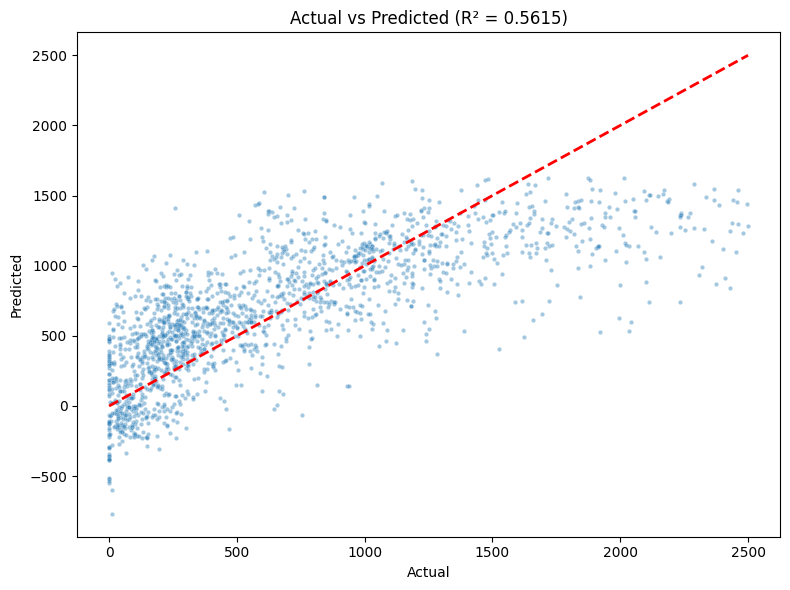

In [166]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=10)
sns.lineplot(x=[0, 2500], y=[0, 2500], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.tight_layout()
plt.show()

Sebaran prediksi terhadap nilai aktual cukup mengikuti garis diagonal yang menunjukkan model mampu menangkap pola umum. Namun terdapat penyebaran yang cukup lebar terutama pada nilai tinggi, serta beberapa prediksi negatif pada nilai aktual rendah yang perlu diinvestigasi lebih lanjut.

### Residual Plot

Residual adalah selisih antara nilai aktual dan nilai prediksi model, yang dihitung dengan rumus `Residual = Aktual - Prediksi`.

$$e_i = y_i - \hat{y}_i$$

Nilai residual positif menunjukkan model memprediksi terlalu rendah, sedangkan nilai negatif berarti model memprediksi terlalu tinggi. Model yang baik akan menghasilkan residual yang tersebar merata di sekitar nol tanpa membentuk pola tertentu.

Pada Residual Plot, titik-titik idealnya tersebar acak di sekitar garis horizontal nol. Jika terlihat pola seperti corong atau lengkungan, ini mengindikasikan adanya masalah pada model. Pada Residual Distribution, histogram yang baik berbentuk lonceng simetris dengan puncak di nol, menandakan error berdistribusi normal dan model tidak memiliki bias sistematis.

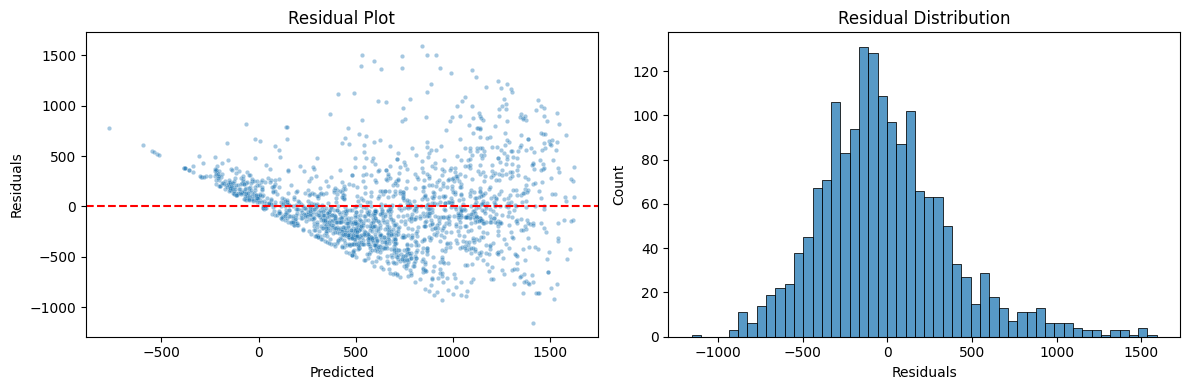

In [167]:
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, s=10, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

sns.histplot(residuals, bins=50, ax=axes[1])
axes[1].set_xlabel('Residuals')
axes[1].set_title('Residual Distribution')
plt.tight_layout()
plt.show()

Plot residual menunjukkan pola heteroskedastisitas dimana *variance error* tidak konstan sepanjang prediksi. Distribusi residual cenderung normal namun sedikit miring, dengan rentang nilai antara -1000 hingga +1500. Hal ini mengindikasikan model linear kurang optimal untuk data ini.

---
## Interpretation

### Koefisien

In [168]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')
coef_df

,feature,coefficient
10,Functioning Day,905.485701
6,Rainfall,-116.560630
8,Seasons,113.633232
9,Holiday,-102.327703
5,Solar Radiation,-59.193711
0,Hour,26.062479
1,Temperature,24.342096
3,Wind speed,20.640243
7,Snowfall,12.369881
2,Humidity,-6.975407


Hari operasional memiliki pengaruh positif terbesar terhadap penyewaan dengan koefisien sekitar 905, artinya saat layanan beroperasi, penyewaan meningkat drastis. Sebaliknya, hujan memiliki pengaruh negatif terbesar yang menunjukkan cuaca buruk sangat mengurangi minat bersepeda. Musim dan jam juga berpengaruh positif secara signifikan terhadap jumlah penyewaan.


### Feature Importance Plot

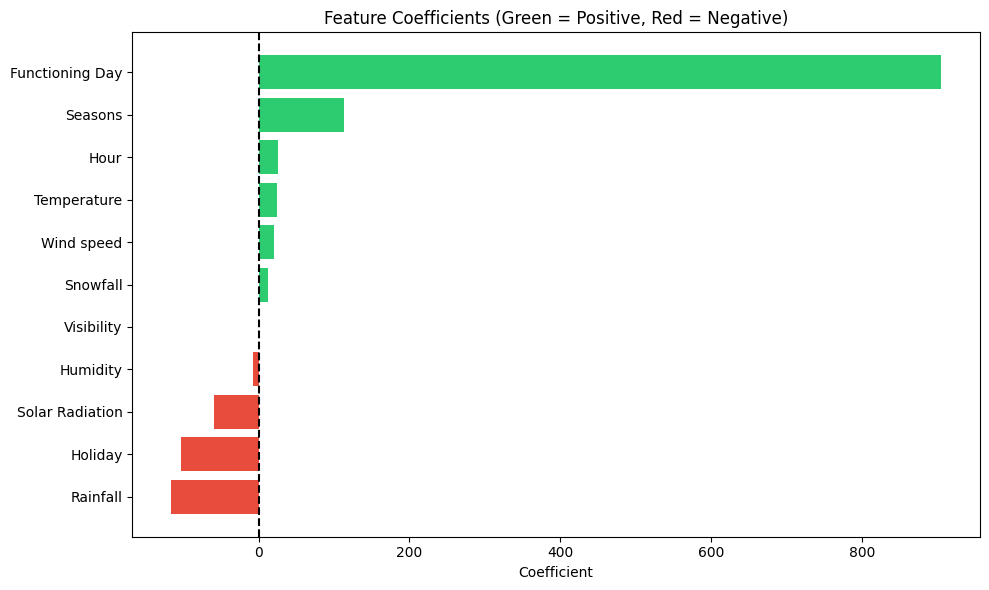

In [169]:
coef_sorted = coef_df.sort_values('coefficient')

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['coefficient']]
ax.barh(coef_sorted['feature'], coef_sorted['coefficient'], color=colors)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient')
ax.set_title('Feature Coefficients (Green = Positive, Red = Negative)')
plt.tight_layout()
plt.show()

Visualisasi koefisien menunjukkan bahwa status operasional layanan menjadi faktor paling menentukan dalam penyewaan sepeda. Kondisi cuaca seperti hujan memberikan dampak negatif yang signifikan, sementara suhu yang lebih hangat dan jam-jam tertentu mendorong peningkatan penyewaan.

### Persamaan Regresi

In [170]:
intercept = model.intercept_
equation = f"Rented Bike Count = {intercept:.2f}"
for feat, coef in zip(X.columns, model.coef_):
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef):.2f}*{feat}"

print(equation)

Rented Bike Count = -643.10 + 26.06*Hour + 24.34*Temperature - 6.98*Humidity + 20.64*Wind speed - 0.01*Visibility - 59.19*Solar Radiation - 116.56*Rainfall + 12.37*Snowfall + 113.63*Seasons - 102.33*Holiday + 905.49*Functioning Day


Persamaan:

$$\hat{y} = \left\{ (-643.10) + (26.06 \cdot \text{Hour}) + (24.34 \cdot \text{Temperature}) + (-6.98 \cdot \text{Humidity}) + (20.64 \cdot \text{Wind speed}) + (-0.01 \cdot \text{Visibility}) + (-59.19 \cdot \text{Solar Radiation}) + (-116.56 \cdot \text{Rainfall}) + (12.37 \cdot \text{Snowfall}) + (113.63 \cdot \text{Seasons}) + (-102.33 \cdot \text{Holiday}) + (905.49 \cdot \text{Functioning Day}) \right\}$$